In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import copy

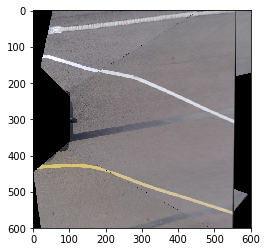

In [2]:
path='./day2_lane1/1296.jpg'
img=cv2.imread(path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
img = cv2.bilateralFilter(img,9,25,75)
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

yellow_low = np.array([[[18, 80, 80]]])
yellow_high = np.array([[[30, 255, 255]]])

yellow_mask = cv2.inRange(img_hsv, yellow_low, yellow_high)

color_mask = cv2.bitwise_and(img,img, mask=yellow_mask)


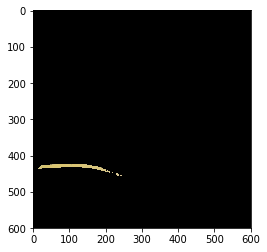

In [4]:
plt.imshow(color_mask)

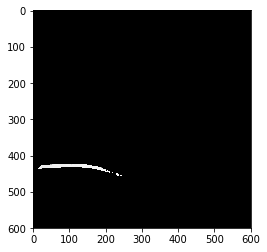

In [5]:
dst = cv2.cvtColor(color_mask, cv2.COLOR_BGR2GRAY)
plt.imshow(dst, cmap='gray')

In [6]:
# Show plot
r_lane = cv2.Canny(dst,100,200)

# http://stackoverflow.com/a/29799815/1698058
# Get index of matching value.
def find_first(item, vec):
    """return the index of the first occurence of item in vec"""
    for i in range(len(vec)):
        if item == vec[i]:
            return i
    return -1

bounds = [400, 500]
# Now the points we want are the lowest-index 255 in each row
window = r_lane[bounds[1]:bounds[0]:-1].transpose()

xy = []
for i in range(len(window)):
    col = window[i]
    j = find_first(255, col)
    if j != -1:
        xy.extend((i, j))
# Reshape into [[x1, y1],...]
data = np.array(xy).reshape((-1, 2))
# Translate points back to original positions.
data[:, 1] = bounds[1] - data[:, 1]

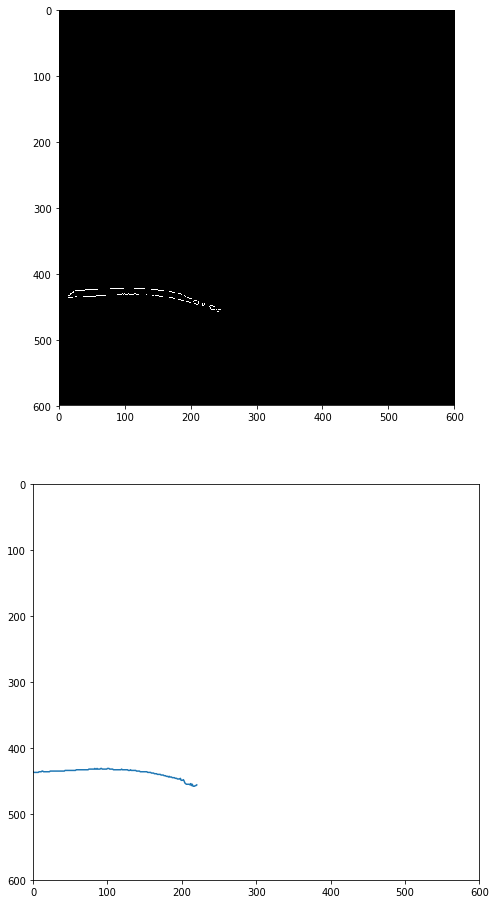

In [7]:
plt.figure(1, figsize=(8, 16))
ax1 = plt.subplot(211)
ax1.imshow(r_lane,cmap = 'gray')
ax2 = plt.subplot(212)
ax2.axis([0, r_lane.shape[1], r_lane.shape[0], 0])
ax2.plot(data[:,1])
plt.show()

In [12]:
data

array([[ 13,  64],
       [ 14,  63],
       [ 15,  63],
       [ 16,  63],
       [ 17,  63],
       [ 18,  63],
       [ 19,  63],
       [ 20,  63],
       [ 21,  64],
       [ 22,  64],
       [ 23,  64],
       [ 24,  64],
       [ 25,  65],
       [ 26,  65],
       [ 27,  64],
       [ 28,  64],
       [ 29,  64],
       [ 30,  64],
       [ 31,  64],
       [ 32,  64],
       [ 33,  64],
       [ 34,  64],
       [ 35,  64],
       [ 36,  65],
       [ 37,  65],
       [ 38,  65],
       [ 39,  65],
       [ 40,  65],
       [ 41,  65],
       [ 42,  65],
       [ 43,  65],
       [ 44,  65],
       [ 45,  65],
       [ 46,  65],
       [ 47,  65],
       [ 48,  65],
       [ 49,  65],
       [ 50,  65],
       [ 51,  65],
       [ 52,  65],
       [ 53,  65],
       [ 54,  65],
       [ 55,  65],
       [ 56,  66],
       [ 57,  66],
       [ 58,  66],
       [ 59,  66],
       [ 60,  66],
       [ 61,  66],
       [ 62,  66],
       [ 63,  66],
       [ 64,  66],
       [ 65,

In [13]:
data[:, 1] = bounds[1] - data[:, 1]
pts = data.reshape((-1, 1, 2)) 

In [14]:
pts

array([[[ 13, 436]],

       [[ 14, 437]],

       [[ 15, 437]],

       [[ 16, 437]],

       [[ 17, 437]],

       [[ 18, 437]],

       [[ 19, 437]],

       [[ 20, 437]],

       [[ 21, 436]],

       [[ 22, 436]],

       [[ 23, 436]],

       [[ 24, 436]],

       [[ 25, 435]],

       [[ 26, 435]],

       [[ 27, 436]],

       [[ 28, 436]],

       [[ 29, 436]],

       [[ 30, 436]],

       [[ 31, 436]],

       [[ 32, 436]],

       [[ 33, 436]],

       [[ 34, 436]],

       [[ 35, 436]],

       [[ 36, 435]],

       [[ 37, 435]],

       [[ 38, 435]],

       [[ 39, 435]],

       [[ 40, 435]],

       [[ 41, 435]],

       [[ 42, 435]],

       [[ 43, 435]],

       [[ 44, 435]],

       [[ 45, 435]],

       [[ 46, 435]],

       [[ 47, 435]],

       [[ 48, 435]],

       [[ 49, 435]],

       [[ 50, 435]],

       [[ 51, 435]],

       [[ 52, 435]],

       [[ 53, 435]],

       [[ 54, 435]],

       [[ 55, 435]],

       [[ 56, 434]],

       [[ 57, 434]],

       [[ 

In [16]:
import copy
original = copy.deepcopy(img)
output2 = cv2.polylines(original, [pts], isClosed=False, color=(255,0,0))

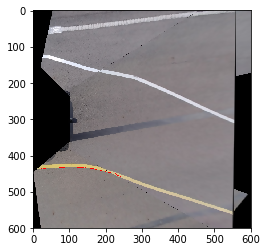

In [19]:
plt.imshow(output2)
# cv2.imshow('out',output2)
# cv2.waitKey = 0
# cv2.destroyAllWindows()

In [20]:
xdata = data[:,0]
ydata = data[:,1]

z = np.polyfit(xdata, ydata, 2)
f = np.poly1d(z)

In [21]:
empty = []
f(0)
print(int(f(0)))
z=(0,f(0))
print(z)
empty.append(z)

441
(0, 441.79612931695283)


In [22]:
np.array(empty)

array([[  0.        , 441.79612932]])

In [36]:
fitxy = []
for n in range(len(xdata)):
    xfit = xdata[n]
    yfit = int(f(n))
    fitxy.append([xfit, yfit])

In [37]:
fitxy = np.array(fitxy).reshape((-1,2))
# fitxy[:, 1] = bounds[1] - fitxy[:, 1]

fitpts = fitxy.reshape((-1,1,2))

In [38]:
fitxy

array([[ 13, 441],
       [ 14, 441],
       [ 15, 441],
       [ 16, 441],
       [ 17, 440],
       [ 18, 440],
       [ 19, 440],
       [ 20, 440],
       [ 21, 440],
       [ 22, 439],
       [ 23, 439],
       [ 24, 439],
       [ 25, 439],
       [ 26, 439],
       [ 27, 439],
       [ 28, 438],
       [ 29, 438],
       [ 30, 438],
       [ 31, 438],
       [ 32, 438],
       [ 33, 437],
       [ 34, 437],
       [ 35, 437],
       [ 36, 437],
       [ 37, 437],
       [ 38, 437],
       [ 39, 436],
       [ 40, 436],
       [ 41, 436],
       [ 42, 436],
       [ 43, 436],
       [ 44, 436],
       [ 45, 436],
       [ 46, 435],
       [ 47, 435],
       [ 48, 435],
       [ 49, 435],
       [ 50, 435],
       [ 51, 435],
       [ 52, 435],
       [ 53, 434],
       [ 54, 434],
       [ 55, 434],
       [ 56, 434],
       [ 57, 434],
       [ 58, 434],
       [ 59, 434],
       [ 60, 434],
       [ 61, 434],
       [ 62, 433],
       [ 63, 433],
       [ 64, 433],
       [ 65,

In [39]:
fitpts

array([[[ 13, 441]],

       [[ 14, 441]],

       [[ 15, 441]],

       [[ 16, 441]],

       [[ 17, 440]],

       [[ 18, 440]],

       [[ 19, 440]],

       [[ 20, 440]],

       [[ 21, 440]],

       [[ 22, 439]],

       [[ 23, 439]],

       [[ 24, 439]],

       [[ 25, 439]],

       [[ 26, 439]],

       [[ 27, 439]],

       [[ 28, 438]],

       [[ 29, 438]],

       [[ 30, 438]],

       [[ 31, 438]],

       [[ 32, 438]],

       [[ 33, 437]],

       [[ 34, 437]],

       [[ 35, 437]],

       [[ 36, 437]],

       [[ 37, 437]],

       [[ 38, 437]],

       [[ 39, 436]],

       [[ 40, 436]],

       [[ 41, 436]],

       [[ 42, 436]],

       [[ 43, 436]],

       [[ 44, 436]],

       [[ 45, 436]],

       [[ 46, 435]],

       [[ 47, 435]],

       [[ 48, 435]],

       [[ 49, 435]],

       [[ 50, 435]],

       [[ 51, 435]],

       [[ 52, 435]],

       [[ 53, 434]],

       [[ 54, 434]],

       [[ 55, 434]],

       [[ 56, 434]],

       [[ 57, 434]],

       [[ 

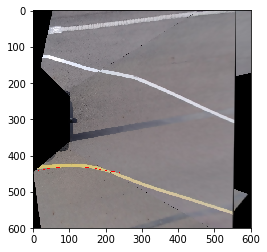

In [40]:
original2 = copy.deepcopy(img)
output2 = cv2.polylines(original2, [fitpts], isClosed=False, color=(255,0,0))
plt.imshow(output2)

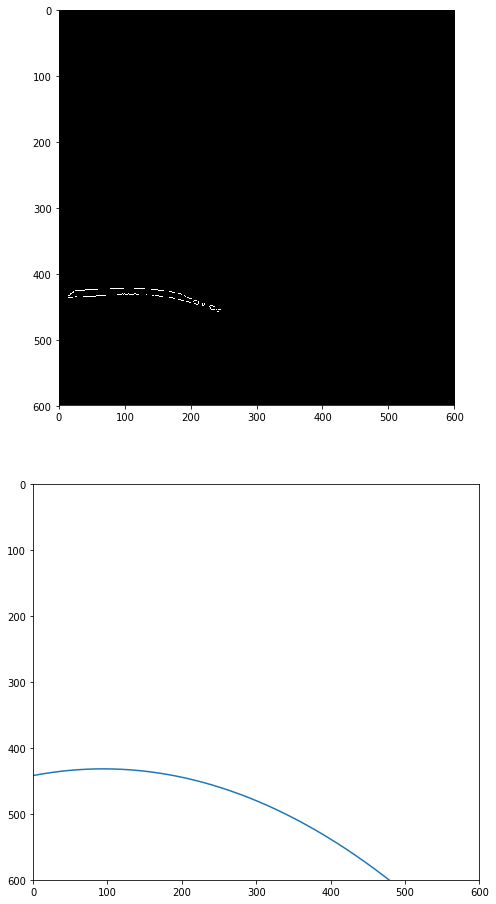

In [40]:
t = np.arange(0, r_lane.shape[1], 1)
plt.figure(2, figsize=(8, 16))
ax1 = plt.subplot(211)
ax1.imshow(r_lane,cmap = 'gray')
ax2 = plt.subplot(212)
ax2.axis([0, r_lane.shape[1], r_lane.shape[0], 0])
ax2.plot(t, f(t))
plt.show()

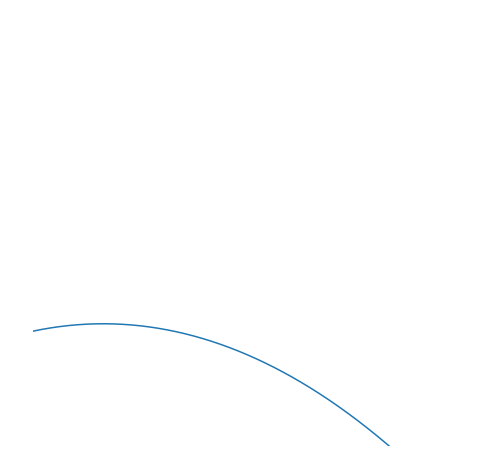

In [41]:
t = np.arange(0, r_lane.shape[1], 1)
fig = plt.figure(figsize=(8,8))
plt.axis([0, r_lane.shape[1], r_lane.shape[0], 0])
plt.plot(t, f(t))
plt.axis('off')
plt.tight_layout
# fig.savefig('graph.png')
fig.savefig('graph.png', bbox_inches='tight',pad_inches=0)

In [42]:
graph=cv2.imread('graph.png')
graph.shape

(455, 481, 3)